In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [23]:
def make_triangle_se(side):
    h = int(round(np.sqrt(3)/2 * side))
    se = np.zeros((h, side), dtype=np.uint8)
    for r in range(h):
        # 每一列在等邊三角形上對應的水平範圍
        span = int(round((side/2) * (1 - r/h)))
        left  = side//2 - span
        right = side//2 + span
        se[r, left:right+1] = 1
    return se

In [24]:
def dilation_binary(img, se, anchor):
    H, W = img.shape
    h, w = se.shape
    ax, ay = anchor
    out_H, out_W = H + h - 1, W + w - 1
    out = np.zeros((out_H, out_W), dtype=np.uint8)

    for i in range(out_H):
        for j in range(out_W):
            hit = False
            for u in range(h):
                for v in range(w):
                    if se[u, v] == 0:
                        continue
                    x = i - u + ax
                    y = j - v + ay
                    if 0 <= x < H and 0 <= y < W and img[x, y] == 1:
                        hit = True
                        break
                if hit:
                    break
            out[i, j] = 1 if hit else 0
    return out

In [25]:
# 1. 建立 30px 正三角形 SE
side = 30
se = make_triangle_se(side)

# 2. 建立 200×200 的二值方形圖像，並在外部補 0
h, w = se.shape
pad_h, pad_w = h - 1, w - 1
original = np.ones((200, 200), dtype=np.uint8)
img = np.pad(
    original,
    pad_width=((pad_h, pad_h), (pad_w, pad_w)),
    mode='constant',
    constant_values=0
)

# 3. 計算 Anchor (三角形重心)
anchor = (int(round(h / 3)), side // 2)

# 4. 執行膨脹
dilated = dilation_binary(img, se, anchor)

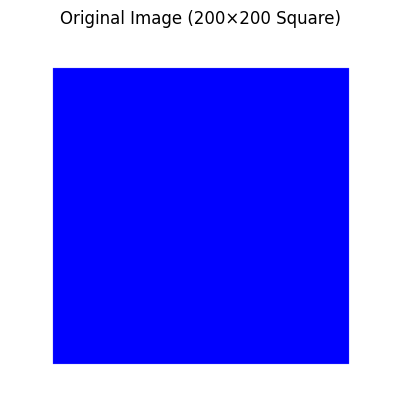

In [26]:
cmap = ListedColormap(['white', 'blue'])

plt.figure()
plt.imshow(img, cmap=cmap, vmin=0, vmax=1, aspect='equal', origin='upper')
plt.title('Original Image (200×200 Square)')
plt.axis('off')


plt.show()

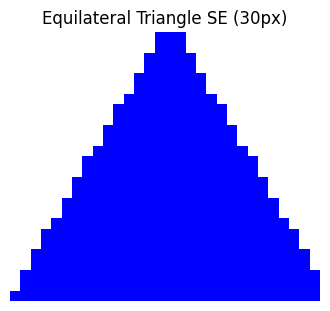

In [27]:
plt.figure(figsize=(4,4))
plt.imshow(se, cmap=cmap, origin='lower', aspect='equal')
plt.title(f'Equilateral Triangle SE ({side}px)')
plt.axis('off')
plt.show()

In [28]:
# 5. 繪製膨脹結果
plt.figure(figsize=(300,300))
plt.imshow(dilated, cmap=cmap)
plt.axis('off')
plt.title('Dilation Result')
plt.show()